La Min Oo ID-6540039

# Q1. Maximum Likelihood Estimation with Features

Step 1 : Plotting the Data

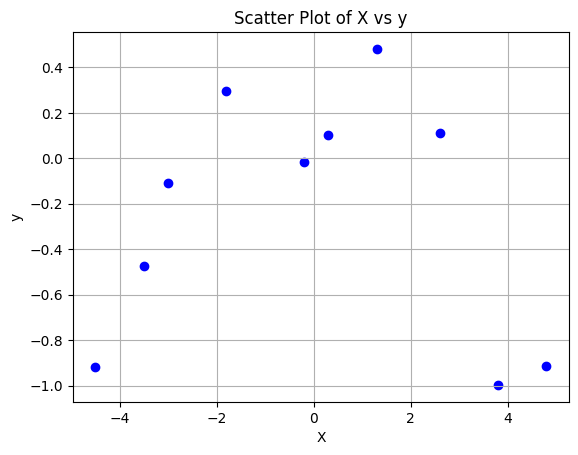

In [41]:
import numpy as np
import matplotlib.pyplot as plt
# Data Initialization
X = np.array([-4.5, -3.5, -3, -1.8, -0.2, 0.3, 1.3, 2.6, 3.8, 4.8]).reshape(-1,1)
y = np.array([
[-0.91650116],
[-0.47546053],
[-0.10972425],
[0.29504095],
[-0.01596218],
[0.10014949],
[0.48104303],
[0.10979023],
[-0.99742128],
[-0.91221826]
]).reshape(-1,1)
X_test = np.array([-3.99, -1.38, -1.37, -0.94,
0.69, 1.4, 1.57, 1.78, 1.81, 4.89]).reshape(-1,1)
y_test = np.array([
[-0.80737607],
[0.19813376],
[0.19537639],
[0.07185977],
[0.24954213],
[0.50662504],
[0.52943298],
[0.52406997],
[0.51999057],
[-0.82318288]
]).reshape(-1,1)
plt.scatter(X, y, color='blue')
plt.title('Scatter Plot of X vs y')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.show()

Step 2: Polynomial Feature Transformation

In [42]:
def poly_features(X, degree):
    return np.hstack([X**i for i in range(degree + 1)])



 Explanation:
 The purpose of this transformation is to take the input data and map it into a higher-dimensional space. This allows linear regression to capture nonlinear relationships between the variables. So,if we increase the degree of this transformation, the complexity of the model also increases.

Step 3: Fitting the Model Using Maximum Likelihood


In [43]:
def nonlinear_features_maximum_likelihood(Phi, y):
    # Maximum Likelihood Estimation for Theta
    return np.linalg.inv(Phi.T @ Phi) @ Phi.T @ y

# Transform data ,polynomial degree = 4
degree = 4
Phi_train = poly_features(X, degree)
Phi_test = poly_features(X_test, degree)

# Estimate parameters
theta = nonlinear_features_maximum_likelihood(Phi_train, y)
print("Estimated Parameters (Theta):", theta)


Estimated Parameters (Theta): [[ 2.89383888e-01]
 [-2.31470379e-02]
 [-5.87255114e-02]
 [ 1.12501954e-03]
 [-1.95778878e-05]]


Step 4: Model Evaluation Using RMSE


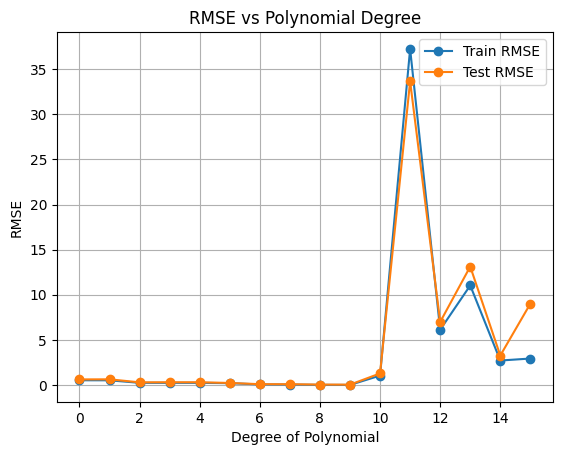

In [44]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Calculate RMSE for polynomial degrees 0 to 15
degrees = range(16)
rmse_train = []
rmse_test = []

for d in degrees:
    Phi_train_d = poly_features(X, d)
    Phi_test_d = poly_features(X_test, d)
    theta_d = nonlinear_features_maximum_likelihood(Phi_train_d, y)
    y_pred_train = Phi_train_d @ theta_d
    y_pred_test = Phi_test_d @ theta_d
    rmse_train.append(rmse(y, y_pred_train))
    rmse_test.append(rmse(y_test, y_pred_test))

# Plot RMSE
plt.plot(degrees, rmse_train, label='Train RMSE', marker='o')
plt.plot(degrees, rmse_test, label='Test RMSE', marker='o')
plt.title('RMSE vs Polynomial Degree')
plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()



Step 5: Selecting the Best Model


Optimal Polynomial Degree: 9


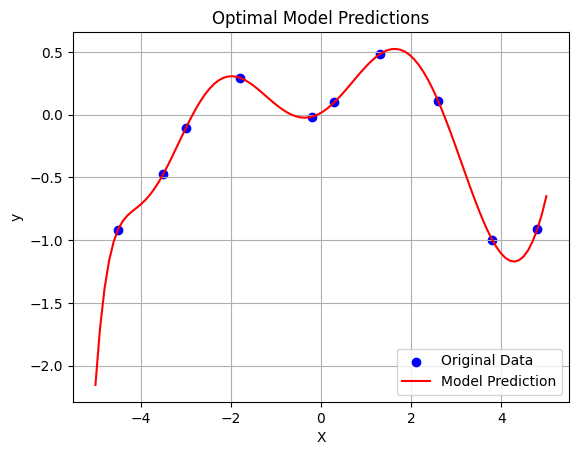

In [45]:
optimal_degree = np.argmin(rmse_test)
print("Optimal Polynomial Degree:", optimal_degree)
theta_optimal = nonlinear_features_maximum_likelihood(poly_features(X, optimal_degree), y)
# Plot predictions
X_test_all = np.linspace(-5, 5, 100).reshape(-1, 1)
Phi_test_all = poly_features(X_test_all, optimal_degree)
y_pred_test_all = Phi_test_all @ theta_optimal

plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X_test_all, y_pred_test_all, color='red', label='Model Prediction')
plt.title('Optimal Model Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()



 Discussion:
The optimal degree of transformation is the one that minimizes the test Root Mean Square Error (RMSE). It strikes a balance between model complexity and accuracy. However, using higher degrees can lead to overfitting as well as using lower degrees can lead to underfitting. Overfitting makes the model learns the noise in the data instead of the actual patterns.Underfitting leads to poor performance.

Step 6: Conclusion

Summary:
The polynomial regression model's performance improves up to a certain degree, but it lower after its best model degree.
The trade-off includes balancing model complexity (degree) and prediction accuracy.That makes to find the right degree that optimizes both accuracy and generalization and have simpler model.

# Q2. K-means

Step 1: Prepare Dataset

In [46]:
import pandas as pd
Mall_Customers_df= pd.read_csv('Mall_Customers.csv')
# Drop missing values
Mall_Customers_df.dropna(inplace=True)
Mall_Customers_df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [47]:
# Select necessary features for clustering
cluster_data = Mall_Customers_df[['Annual Income (k$)', 'Spending Score (1-100)']]
cluster_data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Step 2:Visualize Data

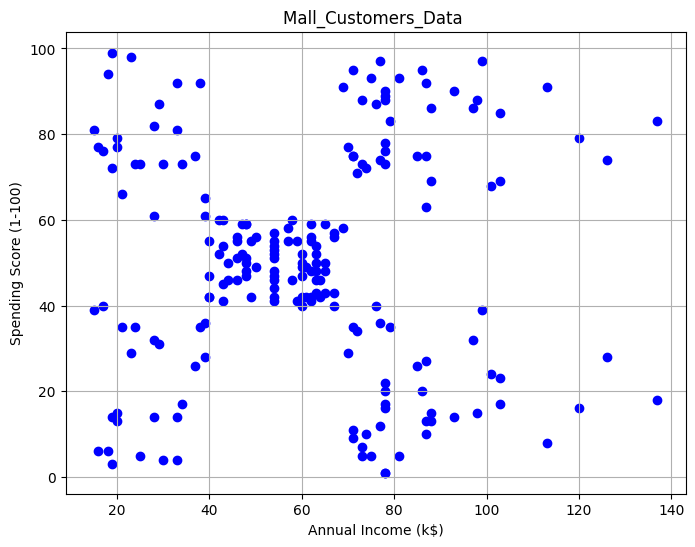

In [48]:
# Scatter plot of the selected features
plt.figure(figsize=(8, 6))
plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], color='blue')
plt.title('Mall_Customers_Data ')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

Step 3: Implement K-means Clustering

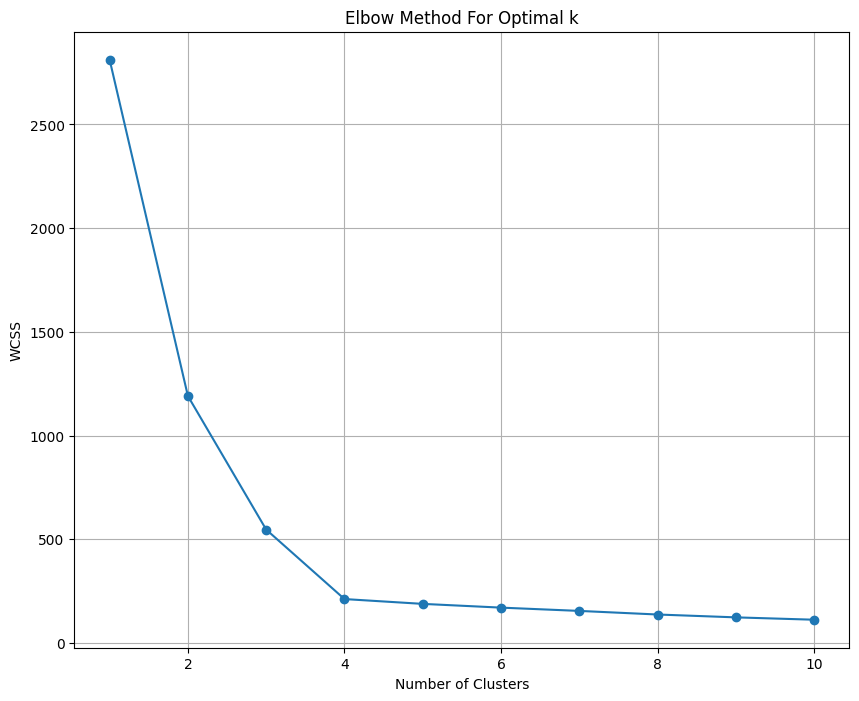

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):  # Testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Step 4: Visualize Data After Clustering

Since the cluster k mean 4 and 5 seem reasonable, I would use 5.

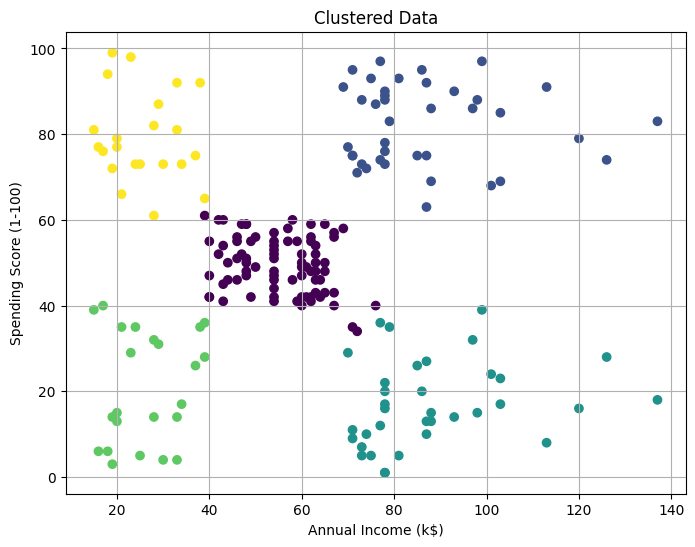

In [50]:
# Apply K-means clustering with the optimal number of clusters
optimal_clusters = 5  # Replace with the determined optimal number
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
Mall_Customers_df['Cluster'] = kmeans.fit_predict(cluster_data)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], c=Mall_Customers_df['Cluster'], cmap='viridis')
plt.title('Clustered Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()


Step 5: Interpret Results

In [51]:
# Get the centroids
centroids = kmeans.cluster_centers_

# Print the centroids for interpretation
print("Centroids of the clusters:")
print(centroids)


Centroids of the clusters:
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


Summary
The graph we got is relation between annual income and spending score.
So by analyzing this, We got 5 groups since the kmeans is 5.
In Cluster 1: we got medium income with medium spending group.
In Cluster 2: we got high income with high spending group.
In Cluster 3: we got high income with low spending group.
In Cluster 4: we got low income with low spending group.
In Cluster 5: we got low income with high spending group.
This data information will approach as important data to the many business systems.